# Inhibition of AKT by Five Different Inhibitors in Breast Cancer (Weichmann, 2021)

In [1]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar import config, helpers, kstar_runner
from kstar.activity import kstar_activity
from kstar.plot import dotplot

import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'Supplements/SupplementaryData/Control_Experiments/AKT_Weichmann_2021'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/ST/akt_inhib_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/ST/akt_inhib_mann_whitney_fpr.tsv', sep='\t', index_col=0)

        
#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

## Plot and cluster kinase activities

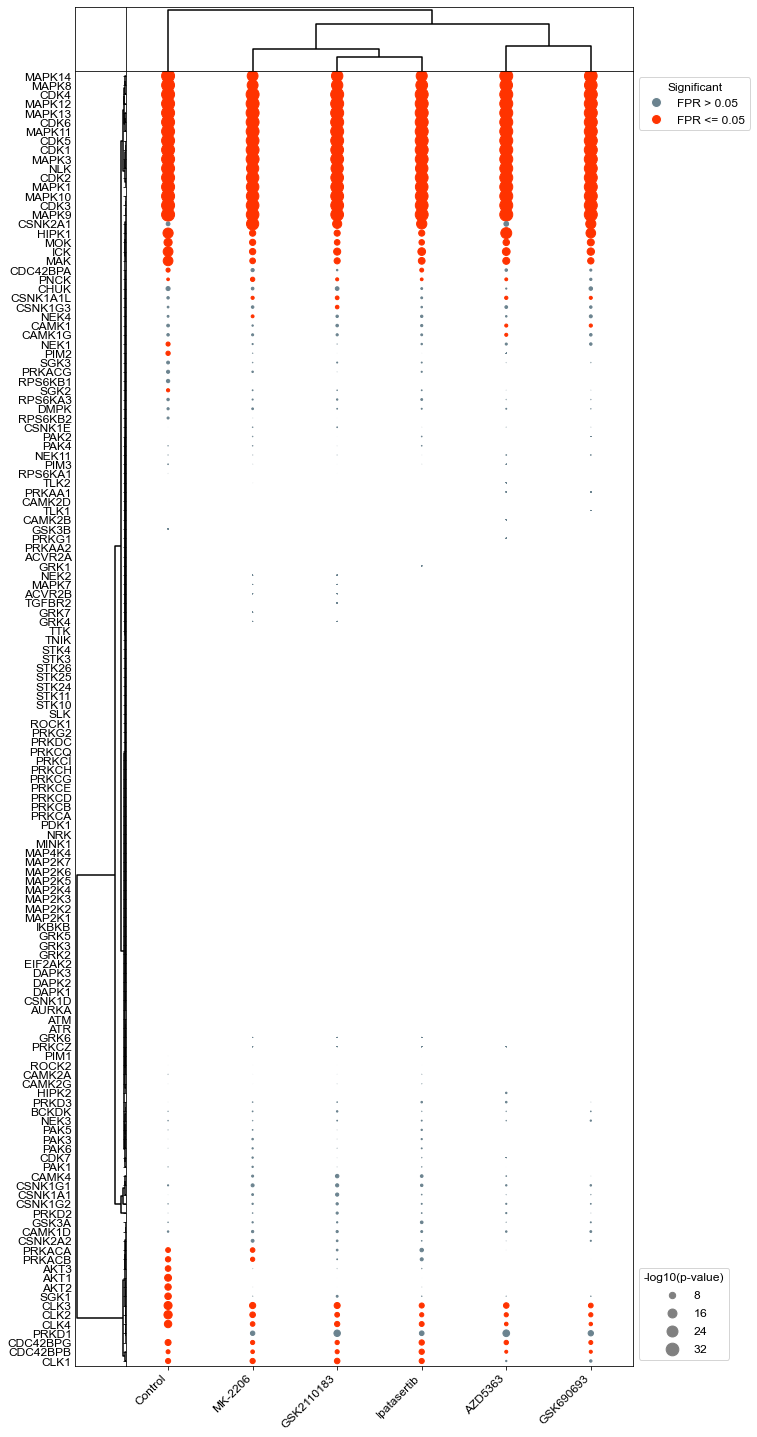

In [2]:
#Setup subplots so that dendrograms are included
fig, axes = plt.subplots(figsize = (10, 25), 
        nrows = 2, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'height_ratios':[0.05, 1], 
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

results = -np.log10(activities)

dots = dotplot.DotPlot(results, 
                       fpr, 
                       figsize = (10,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      kinase_dict = kinase_dict)

#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots.cluster(orientation = 'left', ax = axes[1,0], method='ward')
dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')

dots.dotplot(ax = axes[1,1])
axes[1,0].set_xticks([])
axes[0,0].set_yticks([])
plt.xticks(rotation = 45, ha = 'right')

plt.savefig(odir+'/AKT_all.pdf', bbox_inches='tight')

## Plot and cluster kinase activities, but with only significant kinases

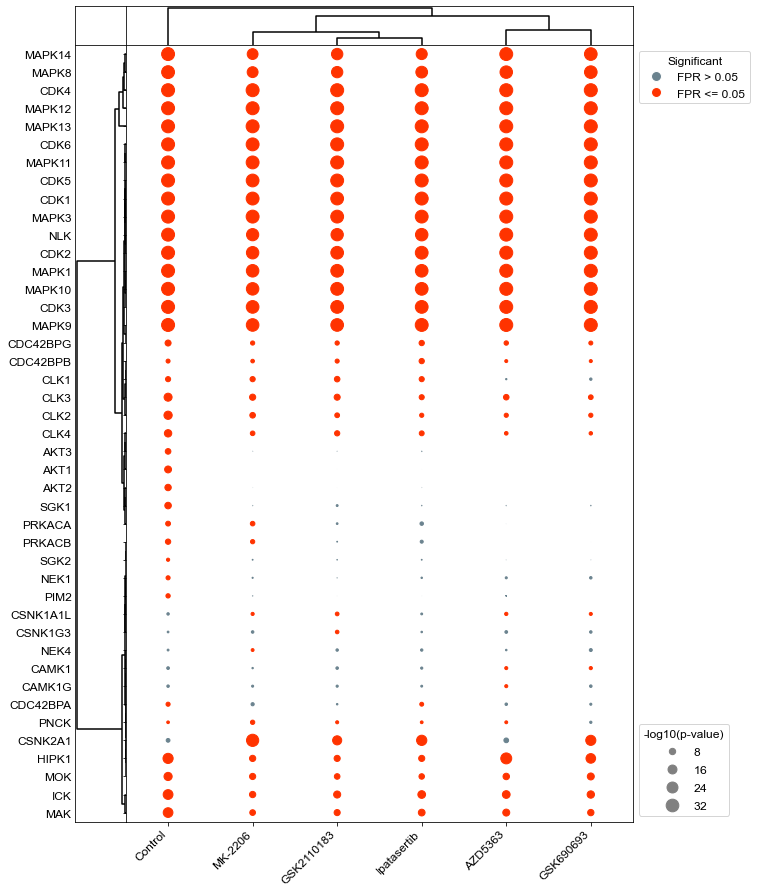

In [3]:
#Setup subplots so that dendrograms are included
fig, axes = plt.subplots(figsize = (10, 15), 
        nrows = 2, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'height_ratios':[0.05, 1], 
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

results = -np.log10(activities)

dots = dotplot.DotPlot(results, 
                       fpr, 
                       figsize = (10,15), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                      kinase_dict = kinase_dict)


#remove significant kinases
dots.drop_kinases_with_no_significance()

#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots.cluster(orientation = 'left', ax = axes[1,0], method='ward')
dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')

dots.dotplot(ax = axes[1,1])
axes[1,0].set_xticks([])
axes[0,0].set_yticks([])
plt.xticks(rotation = 45, ha = 'right')

plt.savefig(odir+'/AKT_significant.pdf', bbox_inches='tight')